# COVID-19 PROJECT


**Group Members:**







Doruk Benli




Ege Öztaş






Gamze Arpa








Emir Asal





# Introduction



The aim of this project is to show the Covid-19 cumulative death counts and recovered cases from different parts of the world and regions of the world. We aim  to analyze the data and come up with a conclusion on how different countries with differet socio-economic bacgrounds deal with this virus, how two distincts of the same country deal with such virus and how this virus affects the seperate regions in the world. Through out the the process we aim to investigate different countries and later on aim to create a model that can predict the potential cases in a given timeline.

# DataSet


Our dataset consists of provided kaggle datasets and datasets that belongs to John Hopkins University and World Health Organization(WHO). Most of the dataset that belongs to kaggle is in csv format. Similarly Data from John Hopkins University and World Health Organization can also be represented as csv and excel


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

In [ ]:
from google.colab import drive
drive.mount("./drive")
path_prefix = "./drive/My Drive"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


# Reading the Turkey Dataset with respect to time



the following dataset will show Turkey's progress throughout the Covid-19 pandemic with respect to time which means the amount of positive cases and death counts with respect to time.

In [ ]:
fname = "covid_19_data_tr.csv"
#df stands for dataframe
df = pd.read_csv(join(path_prefix,fname))

df.dtypes

Province/State    float64
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered           int64
Last_Update        object
dtype: object

as it can be observed from the datatypes, since we analyze a country we are not interested with the Province/State part of this data, the Province/State actually returns Nan(non existence) value since it is missing in the dataset aswell, hence this should be cleared and handeled accordingly. The following code shows the head of the dataframe without dropping the Provinces/State column.

In [ ]:
df.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Last_Update
0,NaN,Turkey,1,0,0,3/11/2020
1,NaN,Turkey,1,0,0,3/12/2020
2,NaN,Turkey,5,0,0,3/13/2020
3,NaN,Turkey,5,0,0,3/14/2020
4,NaN,Turkey,18,0,0,3/15/2020


The following code represents the dataframe without Provinces/state column

In [ ]:
del df["Province/State"]
print(df)

    Country/Region  Confirmed  Deaths  Recovered Last_Update
0           Turkey          1       0          0   3/11/2020
1           Turkey          1       0          0   3/12/2020
2           Turkey          5       0          0   3/13/2020
3           Turkey          5       0          0   3/14/2020
4           Turkey         18       0          0   3/15/2020
..             ...        ...     ...        ...         ...
227         Turkey     359784    9727     313093  10/24/2020
228         Turkey     361801    9799     314390  10/25/2020
229         Turkey     363999    9874     316008  10/26/2020
230         Turkey     366208    9950     317519  10/27/2020
231         Turkey     368513   10027     319181  10/28/2020

[232 rows x 5 columns]


from now we should count the missing values inside the other columns and handle them aswell later confirmed cases, deaths and recovered variables will be represented with respect to time, however since there are 232 rows which means 232 days we dont have a large dataset thus it is better for us to prepare estimation for NaN values such taking average.

In [ ]:
row = len(df)
col = len(df.columns)
sum = 0

for elem in range(col):
  sum=df.loc[[elem]].isna().sum().sum()


print(sum)

0


this means that there are 0 missing values in the entire dataframe so this data is ready to represent with respect to time first we should represent the confirmed case with respect to time then deaths then recovered cases. Now we can visualize the data, However sicne our date's type is Object, we need to turn it into integer first.

The graph below shows us the confirmed cases of Covid-19 in Turkey between 3/11/2020 and 9/27/2020 as a line graph.

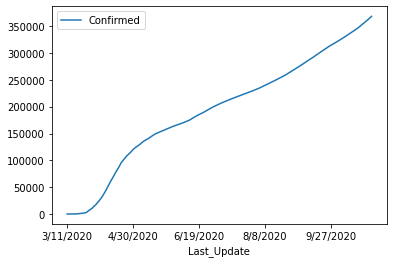

In [ ]:
df.plot(x="Last_Update",y="Confirmed",kind = "line")

The graph below shows us the deaths in Turkey which were caused by Covid-19 between 3/11/2020 and 9/27/2020 as a line graph.

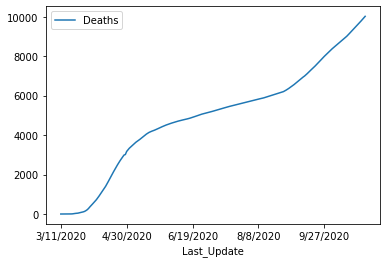

In [ ]:
df.plot(x="Last_Update",y="Deaths",kind = "line")

The graph below shows us the recovered patiens from Covid-19 in Turkey between 3/11/2020 and 9/27/2020 as a line graph.

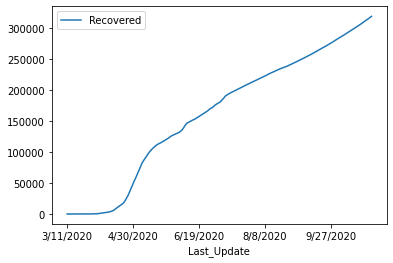

In [ ]:
df.plot(x="Last_Update",y="Recovered",kind = "line")

# Analysis of Graphs

As one can observe all graphs act similarly to each other. To begin with in all parameters the graphs starts with a straight line that indicates there were no such rapid increase in all of the 3 parameters, the reason might be the precautions that the goverment took such as 2 week long curfew and social distancing rule, however after a period of time which is approximately one month later we see a logarithmic increase in the all of the graph. This is due to the fact that one infected person spreads this disease to more than 1 people so the graph grows logartihmicly.logarithmic increase in confirmed cases since both recovered numbers and death numbers are dependedt on the way the confirmed variable behaves. Since it can take approximately 2 weeks for a case to either recover or die, there is a delay between confirmed cases and recovered and deaths numbers in terms of behaviour of graph, however they all behave similarly. Another thing is that we see a that this logarithmic increase ends and all of the 3 parameters(i.e Confirmed, Recovered, Deaths) follows an increasing linear trend. This might happen due to fact that the ones who caught the disease froms a resistance and when a contact happens, they do not get sick and hence slow down the spread rate of the Covid-19.

# Visualization of each WHO region

below there will be the visualization of each region or in other words country of the world and their death counts on covid.

In [ ]:
WorldfName = "country_wise_latest.csv"
Wdf = pd.read_csv(join(path_prefix,WorldfName))
Wdf.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [ ]:
Wdf.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


As one can see there are so many unwanted values, we are only interested in Deaths, recovered and active cases so we have to remove other columns.

In [ ]:
del Wdf["New cases"]
del Wdf["New deaths"]
del Wdf["New recovered"]
del Wdf["Deaths / 100 Cases"]
del Wdf["Recovered / 100 Cases"]
del Wdf["Deaths / 100 Recovered"]
del Wdf["Confirmed last week"]
del Wdf["1 week change"]
del Wdf["1 week % increase"]

In [ ]:
print(Wdf)

         Country/Region  Confirmed  Deaths  Recovered  Active  \
0           Afghanistan      36263    1269      25198    9796   
1               Albania       4880     144       2745    1991   
2               Algeria      27973    1163      18837    7973   
3               Andorra        907      52        803      52   
4                Angola        950      41        242     667   
..                  ...        ...     ...        ...     ...   
182  West Bank and Gaza      10621      78       3752    6791   
183      Western Sahara         10       1          8       1   
184               Yemen       1691     483        833     375   
185              Zambia       4552     140       2815    1597   
186            Zimbabwe       2704      36        542    2126   

                WHO Region  
0    Eastern Mediterranean  
1                   Europe  
2                   Africa  
3                   Europe  
4                   Africa  
..                     ...  
182  Eastern Med

now we have a dataframe which shows only the deaths, recovered and Active counts. Since our dataset has so many categories which is all those different countries, Scatter plot is the type of graph we should use.

In [ ]:
row = len(Wdf)
col = len(Wdf.columns)
sum = 0

for elem in range(col):
  sum=Wdf.loc[[elem]].isna().sum().sum()


print(sum)

0


The whole dataset again has 0 missing values so we can visualize the dataset.

# Finding the total cases for each WHO region respectively.





note: Seperate each region and visualize such as europe asia americas etc etc...

In [ ]:
#finding all the deaths wrto region
dfRegions = Wdf
dfRegions= dfRegions.groupby(["WHO Region"]).sum()
dfRegions.insert(4,"WHO Region",["Africa", "Americas","Eastern Mediterreanean","Europe","South-East Asia","Western Pacific"],True)

print(dfRegions)

                       Confirmed  Deaths  Recovered   Active  \
WHO Region                                                     
Africa                    723207   12223     440645   270339   
Americas                 8839286  342732    4468616  4027938   
Eastern Mediterranean    1490744   38339    1201400   251005   
Europe                   3299523  211144    1993723  1094656   
South-East Asia          1835297   41349    1156933   637015   
Western Pacific           292428    8249     206770    77409   

                                   WHO Region  
WHO Region                                     
Africa                                 Africa  
Americas                             Americas  
Eastern Mediterranean  Eastern Mediterreanean  
Europe                                 Europe  
South-East Asia               South-East Asia  
Western Pacific               Western Pacific  


Since we grouped by WHO regions we had to add a colum that specifies which numbers belong to which region so we added a colum that consists of regions.

with the copy dataframe dfRegions we have total deaths, recovered and active cases for all of the WHO regions, now we will visualize this. Since we have a small category set and we will make comparisons with such categories its logical to use bar charts to represent the relations.

# Visualization of Confirmed number of cases with respect to each WHO Region.

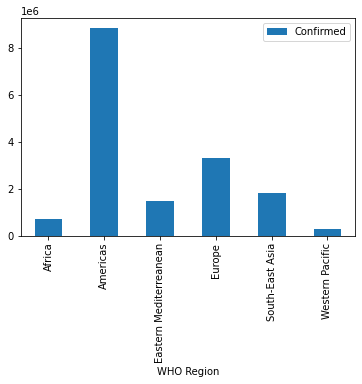

In [ ]:
ax = dfRegions.plot.bar(x="WHO Region",y = "Confirmed")

This chart shows the distribution of confirmed patients by WHO regions. The number of confirmed patients also includes recovers. So this dataset represents the cumulative total of all people who have been sick so far in WHO regions. According to this graph, most people in the Americas have had covid. Europe comes second, followed by South-East-Asia. The lowest number of cases was found in the Western Pacific region.

# Visualization of Death counts with respect to WHO Regions

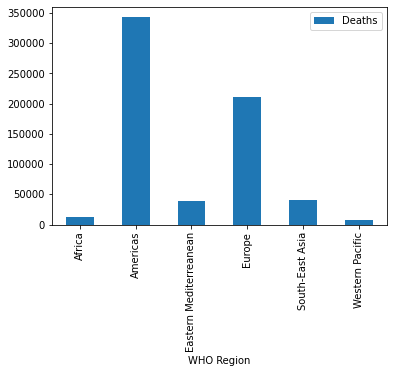

In [ ]:
ax = dfRegions.plot.bar(x="WHO Region",y = "Deaths")

In this dataset, mortality rates of WHO regions of death were examined.The highest death rate seems to be in the Americas. According to this distribution, the second highest death rate is in Europe. The lowest mortality rate seems to be in the Western Pacific region.

# Visualization of recovered number of cases with respect to each WHO Region

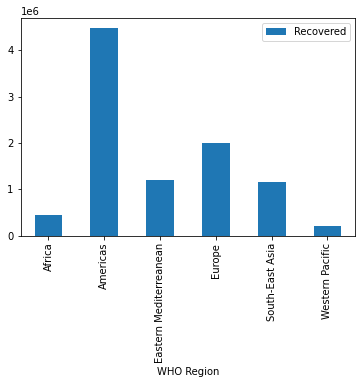

In [ ]:
ax = dfRegions.plot.bar(x="WHO Region",y = "Recovered")

This distribution gives us information about recovery rates. The highest rate of patient recovery in Covid cases is in the Americas. The second highest number of recovered patients is in Europe. The least recovery rate is in the Western Pacific region.

# Visualization of Active cases with respect to each WHO Region

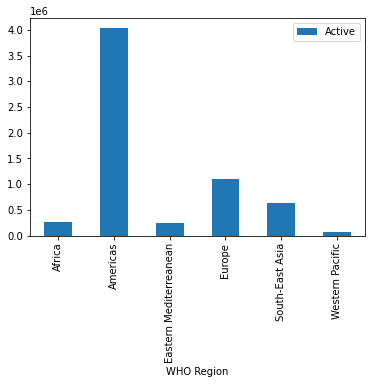

In [ ]:
ax = dfRegions.plot.bar(x="WHO Region",y = "Active")

This graphic distribution gives us the distribution of active covid cases according to WHO regions. The largest number of active patients is currently in the Americas. Second most cases are in Europe, followed by South-East-Asia. The least active patients are in the Western Pacific region.

# Analysis and visualization of developed regions vs least develop regions


In order to have a reasonable comparison between 2 regions, it is logical to pick two regions which has similar confirmed cases to achieve more precise result with the rest of parameters such as death recovered and active cases. So its logical to compare western pacific and Africa due to similar amount of confirmed cases in both regions. Since western pacific region has countries like china, japan south korea they can be thought as more developed when its compared with the countries in Africa.


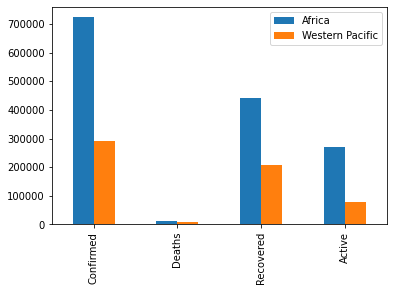

In [ ]:
#here comes the western pacific vs africa graphs.
comparisondf = pd.DataFrame({"Africa":[723207, 12223,440645,270339], "Western Pacific":[292428, 8249, 206770, 77409]}, index=["Confirmed","Deaths","Recovered","Active"])

bars = comparisondf.plot.bar()

# Observations for the comparison of less developed and more developed regions.
The following graph shows the relation between least developed and relatively developed region. There are certain outcomes we can make from the above graph. To begin with we can see that When comparing Western Pacific with Africa we can see that Western Pacific has less confirmed covid-19 cases when its compared with Africa, even though they have higher population which is around 1.9 billion when compared to Africa's 1.2 billion. This indicates that countries in Western Pacific could detect the cases and could seperate them to slow down the infection speed which requires developed healthcare system so as a region one can say that Western Pacific is more developed. One variable which shows similartiy is the Death count. Since Covid-19 is not deadly, the number of dead people on both regions are close to each other, However we can see Africa being slighlty higher. Another variable is recovered cases and in this one Africa has higher recvoered cases but if we look at the percentage of people who recovered from africa we have 440645/723207* 100 which is around 60%, and if we compare this with Western Pacific's 206770/292428*100 we have 70.7%. we can see that Western pacific has higher percentage of people recovered then africa with a big 10%. This might be due to the avvailability of special medical equipments such as techniques like intubating the heavy cases. 4the variable which is active cases is confirms the 3rd varible by showing less active cases in Western Pacific.

# Visualization of a selected province/state of a given WHO region.

in this part of the project we will visualize the confirmed cases deaths recovered cases and active cases of a specific country in a picked WHO Region.

USA is picked since its easy to analyze the neighbourhin countries.

In [ ]:
#getting the provinces file USA.

fname2 = "usa_county_wise.csv"
worldDF = pd.read_csv(join(path_prefix,fname2))

In [ ]:
worldDF.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [ ]:
del worldDF["UID"]
del worldDF["iso2"]
del worldDF["iso3"]
del worldDF["code3"]
del worldDF["FIPS"]
del worldDF["Admin2"]
del worldDF["Country_Region"]
del worldDF["Lat"]
del worldDF["Long_"]

In [ ]:
print(worldDF)

                  Province_State                  Combined_Key     Date  \
0                 American Samoa            American Samoa, US  1/22/20   
1                           Guam                      Guam, US  1/22/20   
2       Northern Mariana Islands  Northern Mariana Islands, US  1/22/20   
3                    Puerto Rico     Adjuntas, Puerto Rico, US  1/22/20   
4                    Puerto Rico       Aguada, Puerto Rico, US  1/22/20   
...                          ...                           ...      ...   
627915                      Utah        Central Utah, Utah, US  7/27/20   
627916                      Utah      Southeast Utah, Utah, US  7/27/20   
627917                      Utah      Southwest Utah, Utah, US  7/27/20   
627918                      Utah           TriCounty, Utah, US  7/27/20   
627919                      Utah        Weber-Morgan, Utah, US  7/27/20   

        Confirmed  Deaths  
0               0       0  
1               0       0  
2              

In [ ]:
dfStates = worldDF
dfStates= dfStates.groupby(["Province_State"]).sum()
dfStates.insert(0,"Province_State",["Alabama", "Alaska","American Samoa","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Diamond Princess","District of Columbia","Florida","Georgia","Grand Princess","Guam","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi", "Missouri","Montana", "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Northern Mariana Islands", "Ohio", "Oklahoma","Oregon", "Pennsylvania","Puerto Rico","Rhode Island","South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virgin Islands", "Virginia", "Washington", "West Virginia","Wisconsin", "Wyoming"],True)

print(dfStates)

                                    Province_State  Confirmed   Deaths
Province_State                                                        
Alabama                                    Alabama    2880805    73446
Alaska                                      Alaska      85686     3999
American Samoa                      American Samoa          0        0
Arizona                                    Arizona    5272303   128478
Arkansas                                  Arkansas    1415802    19171
California                              California   17618695   481757
Colorado                                  Colorado    2860699   142506
Connecticut                            Connecticut    4239220   374346
Delaware                                  Delaware     962637    37494
Diamond Princess                  Diamond Princess       6511        0
District of Columbia          District of Columbia     877997    45014
Florida                                    Florida   12657802   292541
Georgi

The graph below shoes the confirmed cases in states and regions of USA


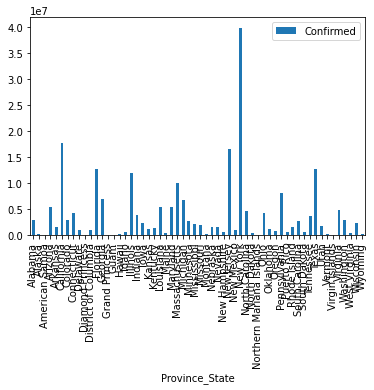

In [ ]:
bx = dfStates.plot.bar(x="Province_State",y = "Confirmed")

The graph below shoes the deaths in states and regions of USA

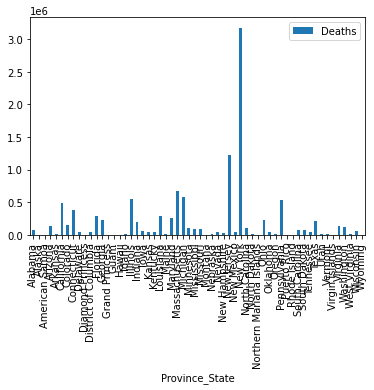

In [ ]:
bx = dfStates.plot.bar(x="Province_State",y = "Deaths")

# Visulization & Analysis of time series based trends of geographically nearby countries/regions.

In this part first we will visualize and then explain the relation between covid cases and death counts in North America region. We will anylise three neighbouring countries: Unites States, Canada and Mexico

In [ ]:
fname = "owid-covid-data.csv"

ndf = pd.read_csv(join(path_prefix,fname))

After reading the .csv file we need assign every country to its own data frame so we can plot them seperately

In [ ]:
us_df = ndf[ndf["location"] == "United States"]
ca_df = ndf[ndf["location"] == "Canada"]
mex_df = ndf[ndf["location"] == "Mexico"]


# Visualization of positive covid cases per day (Unites States - Canada - Mexico)

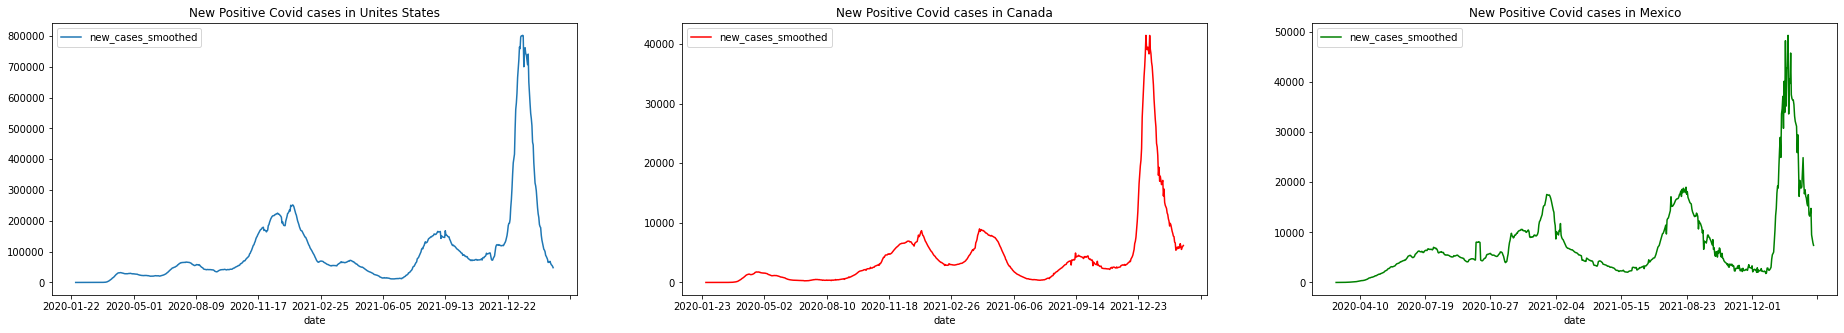

In [ ]:
figure, axes = plt.subplots(1, 3)
us_df.plot(title = "New Positive Covid cases in Unites States", x="date",y="new_cases_smoothed",kind = "line", figsize = (32,5), ax=axes[0])
ca_df.plot(title = "New Positive Covid cases in Canada", x="date",y="new_cases_smoothed",kind = "line", figsize = (32,5), color="red", ax=axes[1])
mex_df.plot(title = "New Positive Covid cases in Mexico", x="date",y="new_cases_smoothed",kind = "line", figsize = (32,5), color="green", ax=axes[2])


These charts show us the number of positive cases in United States, Canada, Mexico according to the dates on the x-axis. In the United States, the maximum number of positive cases was seen on 2021.12.22. In Canada, the most positive case was seen on 2021.12.23. In Mexico, positive cases increased at most by the end of 2021. When we look at all 3 graphs at the same time, we can say that positive cases have been on the rise since the last month of 2021.  The highest number of positive cases in the United States reached 80000, while Canada reached 4000 and Mexico 5000. The high number of these cases is also directly proportional to the populations of the countries in the chart. In areas where the population is high, the disease is transmitted to more people. It can be said that the trend lines for all 3 charts are close to each other.

# Visualization of covid deaths per day (Unites States - Canada - Mexico)

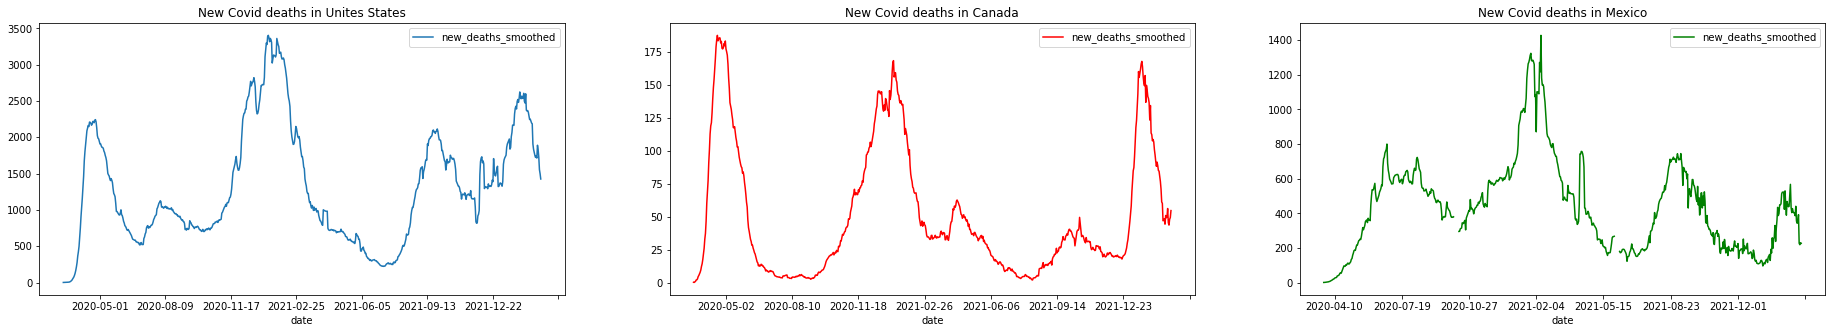

In [ ]:
figure, axes = plt.subplots(1, 3)
us_df.plot(title = "New Covid deaths in Unites States", x="date",y="new_deaths_smoothed",kind = "line", figsize = (32,5), ax=axes[0])
ca_df.plot(title = "New Covid deaths in Canada", x="date",y="new_deaths_smoothed",kind = "line", figsize = (32,5), color="red", ax=axes[1])
mex_df.plot(title = "New Covid deaths in Mexico", x="date",y="new_deaths_smoothed",kind = "line", figsize = (32,5), color="green", ax=axes[2])

# Discussion of any relationship between USA and canada-mexico

These graphical distributions give us the numbers of COVID patients who died in the United States, Mexico, and Canada, according to the dates given on the x-axis. More people died in Canada early on, followed by the United States in second place. United States gave the highest number of deaths between 2021.11.17 and 2021.02.25. Mexico had the highest increase in the number of deaths between 2020.10.27 and 2021.02.04. When the 3 graphs are examined together, the highest number of deaths is in the USA, followed by Mexico. The least number of deaths is Canada. While interpreting these death numbers, the population numbers, development and health conditions of the selected regions should also be taken into consideration. Since the trend lines of these 3 regions are not close to each other, we cannot talk about an inter-regional relationship.

# New Features on Data Sets

To find relationships we need to sum the values in terms of continents. And then make a comparison geographically.

In [ ]:
continents = ndf
continents = continents.groupby(["continent"]).sum()
continents.insert(0,"continent",["Africa", "Asia","Europe","North America","Oceania", "South America"],True)


# Relation between smoking ratio and covid deaths

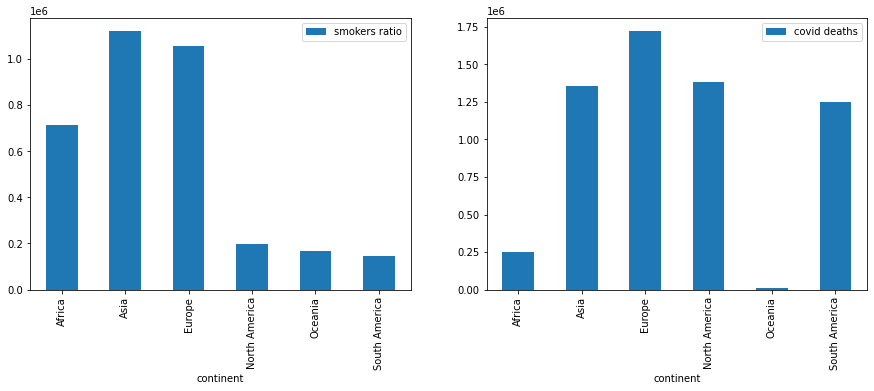

In [ ]:
figure, axes = plt.subplots(1, 2)

ax = continents.plot.bar(x="continent",y = "male_smokers", ax=axes[0], figsize = (15,5), label = "smokers ratio")
ax = continents.plot.bar(x="continent",y = "new_deaths", ax=axes[1], figsize = (15,5), label = "covid deaths")

These graphs give us the rate of smoking and the rate of patients who died from covid. The highest cigarette smoking is in the Asian and Europe region, and the least cigarette smoking is in the South America region. Although more cigarettes are consumed in Asia, the region losing the most patients is Europe. More people smoke in Africa than South America, but South America has a higher death rate than Africa. It is somewhat difficult to interpret the relationship between the rate of cigarette consumption and the covid death rates by looking at these graphs. We cannot give a full description of the relationship.

# Relation between diabetes prevalence and covid deaths

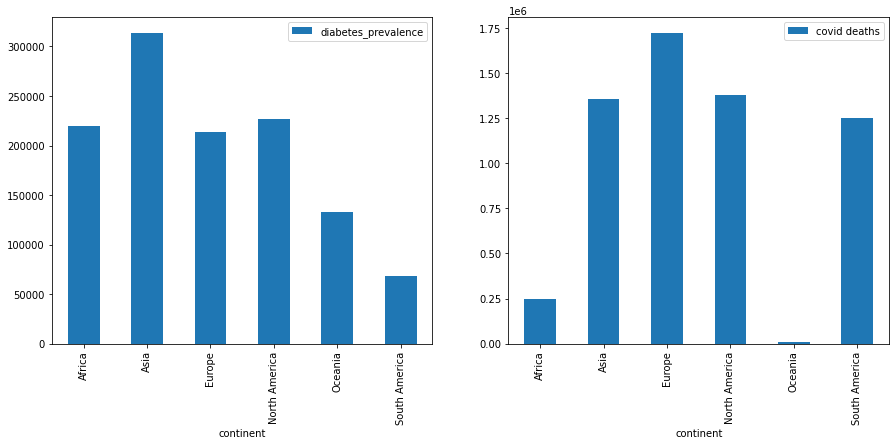

In [ ]:
figure, axes = plt.subplots(1, 2)

ax = continents.plot.bar(x="continent", y = "diabetes_prevalence", ax=axes[0], figsize = (15,5))
ax = continents.plot.bar(x="continent", y = "new_deaths", ax=axes[1], figsize = (15,6), label = "covid deaths")


These charts give us the distribution of diabetes prevalence and covid mortality rates. The places with the highest incidence of diabetes are in Asia and North America. Despite this, the highest mortality rate seems to be in Europe and North America. The region with the lowest incidence of diabetes is South America, but the death rate in South America is higher than in Oceania. Therefore, we cannot talk about the relationship between diabetes and the number of deaths from covid by looking at these graphs.

# Relation between total continent population and positive cases

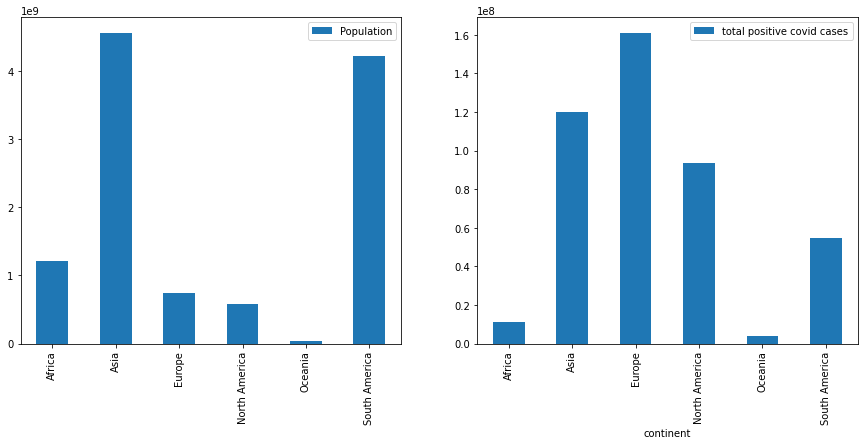

In [ ]:
figure, axes = plt.subplots(1, 2)

populationdf = pd.DataFrame({"Population":[1216000000, 4561000000, 748458986, 579000000, 43666462, 4225000000]}, index=["Africa","Asia","Europe","North America", "Oceania", "South America"])

populationdf = populationdf.plot.bar(ax=axes[0])
ax = continents.plot.bar(x="continent",y = "new_cases", ax=axes[1], figsize = (15,6), label = "total positive covid cases")


These graphs give us information about the population and the number of positive covid cases. The highest population is in the Asian region, followed by South America. The least populated region is the Oceanian. Although the Asian region has the highest population, Europe has the highest number of positive cases. The second highest number of positive cases is in the Asian region. The Oceanian region, which has the least population, also has the least total number of positive cases. Unfortunately, we cannot say that there is a relationship between these two graphs.

# Relation between Cardiovasc and covid deaths

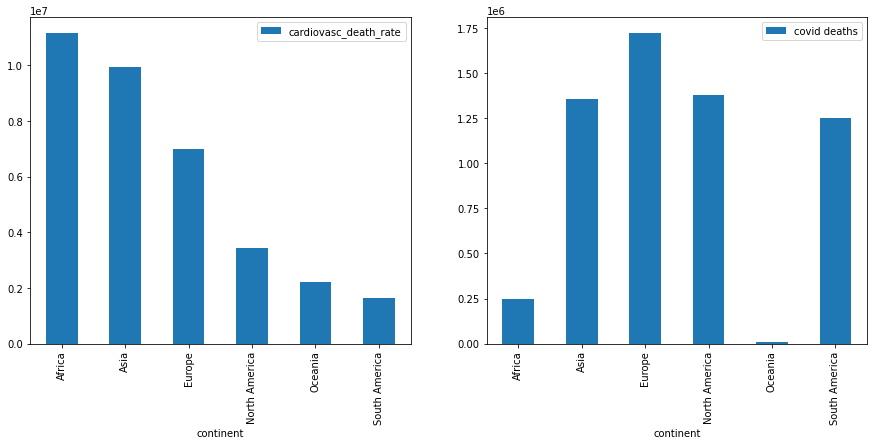

In [ ]:
figure, axes = plt.subplots(1, 2)

ax = continents.plot.bar(x="continent",y = "cardiovasc_death_rate", ax=axes[0], figsize = (15,5))
ax = continents.plot.bar(x="continent",y = "new_deaths", ax=axes[1], figsize = (15,6), label = "covid deaths")


These graphs give us the rate of people who died using the cardiovasc drug and the number of people who died from covid. The highest rate of deaths from Cardiovasc is in the African region and second in Asia. The proportion of deaths using Cardiovasc is the least in South America. Looking at the overall mortality rates, the highest number of deaths is in Europe and the lowest in the Oceania region. Looking at these two graphs, unfortunately, it is difficult to say that there is a relationship between them. So there is no relationship.

# Statical Tests On Geographically Nearby Countries (USA - Canada - Mexico)

We will use previously defined us, ca & mex dataframes for the statistic tests.

# Confirmed Positive Cases Statistic Comparison (North America)

**United States**

In [ ]:
print("Mean:", int(us_df["new_cases"].mean()))
print("Standard Deviation:", int(us_df["new_cases"].std()))
print("Peak Day:", int(us_df["new_cases"].max()))

Mean: 102542
Standard Deviation: 147796
Peak Day: 1368167


Number of confirmed positive cases compared to North America for United States mean 102542, standard deviation 147796 peak day is 1368167.

**Canada**

In [ ]:
print("Mean:", int(ca_df["new_cases"].mean()))
print("Standard Deviation:", int(ca_df["new_cases"].std()))
print("Peak Day:", int(ca_df["new_cases"].max()))

Mean: 4313
Standard Deviation: 6937
Peak Day: 58934


Number of confirmed positive cases compared to North America for Canada mean 4313, standard deviation 6937 peak day is 58934.

**Mexico**

In [ ]:
print("Mean:", int(mex_df["new_cases"].mean()))
print("Standard Deviation:", int(mex_df["new_cases"].std()))
print("Peak Day:", int(mex_df["new_cases"].max()))

Mean: 7536
Standard Deviation: 10779
Peak Day: 109895


Number of confirmed positive cases compared to North America for Mexico mean 7536, standard deviation 10779 peak day is 109895.

# Death Counts Statistic Comparison (North America)

**United States**

In [ ]:
print("Mean:", int(us_df["new_deaths"].mean()))
print("Standard Deviation:", int(us_df["new_deaths"].std()))
print("Peak Day::", int(us_df["new_deaths"].max()))

Mean: 1302
Standard Deviation: 986
Peak Day:: 4442


Number of deaths statistically compared to North America for United States mean 1302, standard deviation 986
peak day is 4442.

**Canada**

In [ ]:
print("Mean:", int(ca_df["new_deaths"].mean()))
print("Standard Deviation :", int(ca_df["new_deaths"].std()))
print("Peak Day:", int(ca_df["new_deaths"].max()))

Mean: 50
Standard Deviation : 51
Peak Day: 272


Number of deaths statistically compared to North America for Canada mean 50, standard deviation 51
peak day is 272.

**Mexico**

In [ ]:
print("Mean:", int(mex_df["new_deaths"].mean()))
print("Standard Deviation:", int(mex_df["new_deaths"].std()))
print("Peak Day:", int(mex_df["new_deaths"].max()))

Mean: 437
Standard Deviation: 362
Peak Day: 3050


Number of deaths statistically compared to North America for Mexico mean 437, standard deviation 362
peak day is 3050.

# Statistical Check wether Geographical location has any effect on the confirmed and death counts of countries/regions throughout the time period.









in this part of the project we will make an analysis on wether geographical location has any effect on the trend of covid-19. To be able to analyze this, we should have the cumilative counts of the parameters to total active cases then calculating the means of regions and calculating the mean of the whole world to see wether a region does better at fighting againsts covid-19.








To begin with we should calculate the mean of the whole world in terms of active cases and death counts to compare with other regions.

In [ ]:
print(Wdf)

         Country/Region  Confirmed  Deaths  Recovered  Active  \
0           Afghanistan      36263    1269      25198    9796   
1               Albania       4880     144       2745    1991   
2               Algeria      27973    1163      18837    7973   
3               Andorra        907      52        803      52   
4                Angola        950      41        242     667   
..                  ...        ...     ...        ...     ...   
182  West Bank and Gaza      10621      78       3752    6791   
183      Western Sahara         10       1          8       1   
184               Yemen       1691     483        833     375   
185              Zambia       4552     140       2815    1597   
186            Zimbabwe       2704      36        542    2126   

                WHO Region  
0    Eastern Mediterranean  
1                   Europe  
2                   Africa  
3                   Europe  
4                   Africa  
..                     ...  
182  Eastern Med

In [ ]:
world_death_mean = Wdf["Deaths"].mean()
print(world_death_mean)

3497.51871657754


The above number is the mean of deaths of the whole world, now we will calculate each regions death counts and compare them with the number above.

In [ ]:
europe_death_mean = Wdf.groupby(by="WHO Region")["Deaths"].mean()["Europe"]
africa_death_mean = Wdf.groupby(by="WHO Region")["Deaths"].mean()["Africa"]
americas_death_mean = Wdf.groupby(by="WHO Region")["Deaths"].mean()["Americas"]
western_pacific_death_mean = Wdf.groupby(by="WHO Region")["Deaths"].mean()["Western Pacific"]
eastern_med_death_mean = Wdf.groupby(by="WHO Region")["Deaths"].mean()["Eastern Mediterranean"]
SEA_death_mean = Wdf.groupby(by="WHO Region")["Deaths"].mean()["South-East Asia"]

In [ ]:
print("Europe Death Mean:",europe_death_mean)
print("Africa Death Mean:", africa_death_mean)
print("Americas Death Mean:", americas_death_mean)
print("Western Pacific Death Mean:", western_pacific_death_mean)
print("Eastern Mediterranean Death Mean:", eastern_med_death_mean)
print("South-East Asia Death Mean:", SEA_death_mean)
print("**************************************************************")
print("World death mean is:",Wdf["Deaths"].mean())

Europe Death Mean: 3770.4285714285716
Africa Death Mean: 254.64583333333334
Americas Death Mean: 9792.342857142858
Western Pacific Death Mean: 515.5625
Eastern Mediterranean Death Mean: 1742.6818181818182
South-East Asia Death Mean: 4134.9
**************************************************************
World death mean is: 3497.51871657754


In [ ]:
from scipy.stats import skewnorm, norm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

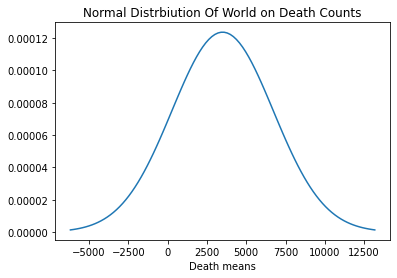

In [ ]:
#number of instances(all countries)
n = 187
#mean 
m = world_death_mean
#calculating the standard deviation for regions
values = [europe_death_mean, africa_death_mean, americas_death_mean, western_pacific_death_mean, eastern_med_death_mean,SEA_death_mean]
std = np.std(values)

x = np.linspace(m-3*std, m + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, m, std))
plt.title("Normal Distrbiution Of World on Death Counts")
plt.xlabel("Death means")
plt.show()

Negative death values are due to fact that we take world mean as the mean and the x_axis range is between mean +- 3 times standart dev. since 3 times stdandart dev falls to negaitve part negative values come up.

From the values of death means we can see warm regions has less death means, which shows that the virus is more affective in the cold climates such as americas where there is canada which is known for hars cold climate or europe where most of the countries has dominant cold climate.

In the previous section, we calculated the mean deaths in the regions. We reached the values of 3770.4285714285716 for Europe, 254.645833333333334 for Africa, 9792.342857142858 for America, 515.5625 for the Western Pacific, 1742.6818181818182 for the Eastern Mediterranean, and 4134.9 for South-East Asia. Finally, the mean death rate in the world is 3497.51871657754. Africa, East Mediterranean, and Western Pacific regions are in the average of 0-2500 deaths in this chart, while Europe and South-East Asia are between 2500-5000. Finally, America is in the 7500-10000 range.

# MEANS OF NUMBER OF ACTIVE CASES



In this segment we calculate the mean of number of active cases and standard deviations of active cases with respect to world mean in order to see the relationship between countries.

In [ ]:
world_AC_mean = Wdf["Active"].mean()
print(world_AC_mean)

34001.935828877


Above code shows the mean of active cases of the world

In [ ]:
europe_AC_mean = Wdf.groupby(by="WHO Region")["Active"].mean()["Europe"]
africa_AC_mean = Wdf.groupby(by="WHO Region")["Active"].mean()["Africa"]
americas_AC_mean = Wdf.groupby(by="WHO Region")["Active"].mean()["Americas"]
western_pacific_AC_mean = Wdf.groupby(by="WHO Region")["Active"].mean()["Western Pacific"]
eastern_med_AC_mean = Wdf.groupby(by="WHO Region")["Active"].mean()["Eastern Mediterranean"]
SEA_AC_mean = Wdf.groupby(by="WHO Region")["Active"].mean()["South-East Asia"]

In [ ]:
print("Europe Active Mean:",europe_AC_mean)
print("Africa Active Mean:", africa_AC_mean)
print("Americas Active Mean:", americas_AC_mean)
print("Western Pacific Active Mean:", western_pacific_AC_mean)
print("Eastern Mediterranean Active Mean:", eastern_med_AC_mean)
print("South-East Asia Active Mean:", SEA_AC_mean)
print("**************************************************************")
print("World Active mean is:",Wdf["Active"].mean())

Europe Active Mean: 19547.428571428572
Africa Active Mean: 5632.0625
Americas Active Mean: 115083.94285714286
Western Pacific Active Mean: 4838.0625
Eastern Mediterranean Active Mean: 11409.318181818182
South-East Asia Active Mean: 63701.5
**************************************************************
World Active mean is: 34001.935828877


the above finding shows the average cases of each WHO region and their comparison for the world mean.

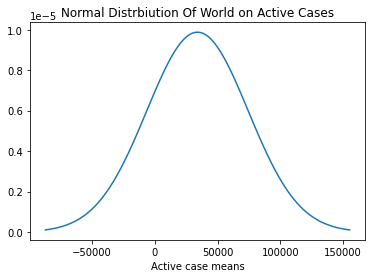

In [ ]:
#number of instances(all countries)
n = 187
#mean 
m = world_AC_mean
#calculating the standard deviation for regions
values = [europe_AC_mean, africa_AC_mean, americas_AC_mean, western_pacific_AC_mean, eastern_med_AC_mean,SEA_AC_mean]
std = np.std(values)

x = np.linspace(m-3*std, m + 3*std, 100)
plt.plot(x, stats.norm.pdf(x, m, std))
plt.title("Normal Distrbiution Of World on Active Cases")
plt.xlabel("Active case means")
plt.show()

In the previous section, we found the active mean values for the regions. This value is 19547.428571428572 for Europe, 5632.0625 for Africa, 115083.94285714286 for America, 4838.0625 for Western Pacific, 11409.318181818182 for Eastern Mediterranean and 63701.5 for South-East Asia. Finally, the world active mean is 34001.935828877. Africa, East Mediterranean, Western Pacific and Europe are in the range of 0-50000 on the chart, while South-East Asia is in the range of 50000-100000 on the chart. Finally, America was in the range of 100000-150000.

# Statistical check wether there exists any significant difference exists between least developed and developed WHO regions.

In [ ]:
print(comparisondf)

           Africa  Western Pacific
Confirmed  723207           292428
Deaths      12223             8249
Recovered  440645           206770
Active     270339            77409


previously we compared western pacific and africa WHO regions and above we have world data so now we can compare these two regions to show the relationship.

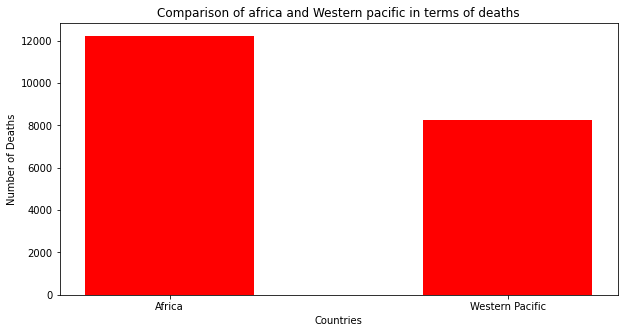

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

countries =["Africa", "Western Pacific"]

Deaths = [12223,8249]

fig = plt.figure(figsize = (10, 5))

plt.bar(countries, Deaths, color ='red',
        width = 0.5)

plt.title("Comparison of africa and Western pacific in terms of deaths")
plt.xlabel("Countries")
plt.ylabel("Number of Deaths")
plt.show()

Looking at the chart and comparing the Africa-Western Pacific; Death rates in Africa soar above 12000, while for the Western Pacific it's around 8000.

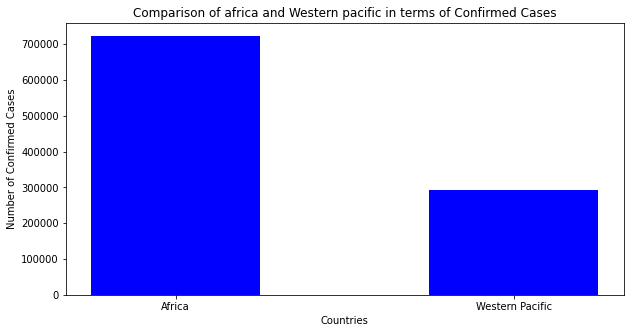

In [ ]:
countries =["Africa", "Western Pacific"]

Confirmed = [723207,292428]

fig = plt.figure(figsize = (10, 5))

plt.bar(countries, Confirmed, color ='blue',
        width = 0.5)

plt.title("Comparison of africa and Western pacific in terms of Confirmed Cases")
plt.xlabel("Countries")
plt.ylabel("Number of Confirmed Cases")
plt.show()

Looking at the chart and comparing the Africa-Western Pacific; confirmed cases in Africa soar above 700000, while for the Western Pacific it's around 300000.

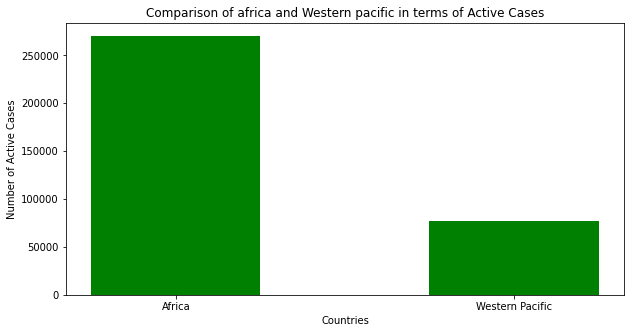

In [ ]:
countries =["Africa", "Western Pacific"]

Active = [270339,77409]

fig = plt.figure(figsize = (10, 5))

plt.bar(countries, Active, color ='green',
        width = 0.5)

plt.title("Comparison of africa and Western pacific in terms of Active Cases")
plt.xlabel("Countries")
plt.ylabel("Number of Active Cases")
plt.show()

Looking at the chart and comparing the Africa-Western Pacific; active cases in Africa soar above 250000, while for the Western Pacific it's in between 50000-100000.

In [ ]:
import math

values = [europe_death_mean, africa_death_mean, americas_death_mean, western_pacific_death_mean, eastern_med_death_mean,SEA_death_mean]

def variance(data, ddof=0):
  n = len(data)
  mean = sum(data) / n
  return sum((x - mean) ** 2 for x in data) / (n - ddof)


def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

deaths_Std =stdev(values)
print(deaths_Std)

3227.313058574289


null hypothesis = Africa as a region has more deaths than western_pacific Ma>Mwp

Alternative hypothesis = Western_pacific has more deaths or they have equal deaths Mwp >= Wa

In [ ]:
world_deaths_size= 12223 + 342732 + 38339 + 211144 + 41349 + 8249

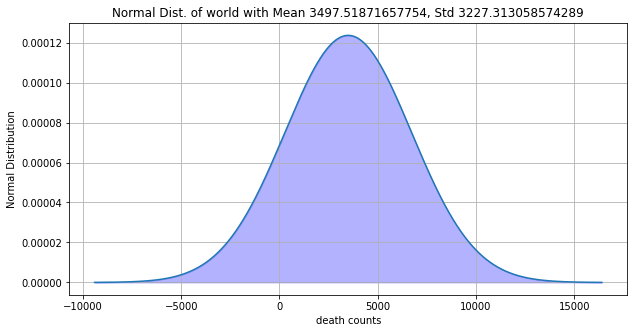

In [ ]:
# mean and std values for death counts of Africa
n = 12223 # population is world_deaths_size
values = [europe_death_mean, africa_death_mean, americas_death_mean, western_pacific_death_mean, eastern_med_death_mean,SEA_death_mean]

mean = world_death_mean
#sampling std is the total deaths of the world /square root of deaths of africa
std = stdev(values)
offset = 4*std


x = np.linspace(mean - offset, mean + offset, n)

y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.grid()
plt.xlabel("death counts")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. of world with Mean {mean}, Std {std}")
plt.show()

the above graph represents the distribution of africa by comparing the means with other regions such as Western pacific we can understand the relation but we should first normalize this by calcuating the z value. The more absolute value of z-value gets bigger, the more it shows difference with the mean of the world.

In [ ]:
n = 12223

values = [europe_death_mean, africa_death_mean, americas_death_mean, western_pacific_death_mean, eastern_med_death_mean,SEA_death_mean]

mean = world_death_mean
std = stdev(values)/np.sqrt(n)

sample_mean = africa_death_mean

z_score = (sample_mean - mean) / std

print("z-score: {}".format(z_score))

z-score: -111.09070830667518


now we will locate our sample in world normal distribution. Z value is too big due to the fact that world death mean is around 3.4k but africa death mean is only 254, which means the difference between deaths mean is very huge.

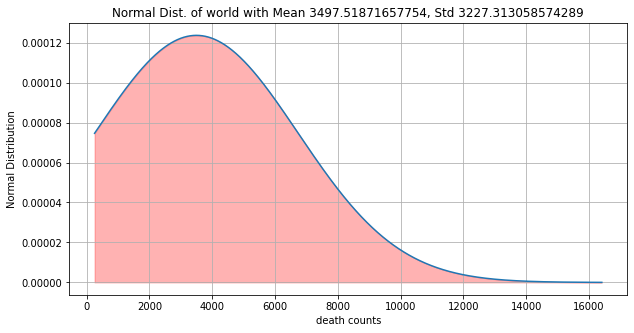

In [ ]:
# mean and std values for death counts of Africa
n = 12223 # population is world_deaths_size
values = [europe_death_mean, africa_death_mean, americas_death_mean, western_pacific_death_mean, eastern_med_death_mean,SEA_death_mean]

mean = world_death_mean
#sampling std is the total deaths of the world /square root of deaths of africa
std = stdev(values)
offset = 4*std


x = np.linspace(africa_death_mean, mean + offset, n)

y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.grid()
plt.xlabel("death counts")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="r")
plt.title(f"Normal Dist. of world with Mean {mean}, Std {std}")
plt.show()

above the left red line is the point where africa stands which is very far left of the graph which shows the average death in africa is vey low when its compared with the world. Now we will do the same analysis for the western pacific.(since there is size problem with number of pixel image is also provided.)

In [ ]:
n = 8249

values = [europe_death_mean, africa_death_mean, americas_death_mean, western_pacific_death_mean, eastern_med_death_mean,SEA_death_mean]

mean = world_death_mean
std = stdev(values)/np.sqrt(n)

sample_mean = western_pacific_death_mean

z_score = (sample_mean - mean) / std

print("z-score: {}".format(z_score))

z-score: -83.91910028839719


since the absolute value of z-score is smaller, it means that western pacific region, when its compared with africa, acts more like the rest of the world.

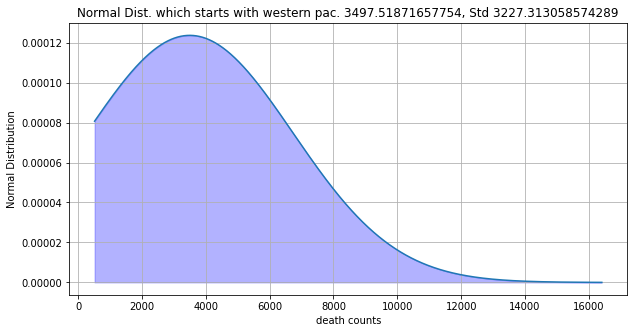

In [ ]:
n = 8249 # population is world_deaths_size
values = [europe_death_mean, africa_death_mean, americas_death_mean, western_pacific_death_mean, eastern_med_death_mean,SEA_death_mean]

mean = world_death_mean
#sampling std is the total deaths of the world /square root of deaths of africa
std = stdev(values)
offset = 4*std


x = np.linspace(western_pacific_death_mean, mean + offset, n)

y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.grid()
plt.xlabel("death counts")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. which starts with western pac. {mean}, Std {std}")
plt.show()

#Analysis of two regions Africa vs Western Pacific







we have a similar result for western pacific region as well but this time we are a bit closer to the mean, however we are still very far from the mean. It looks like Africa, relatively least developed region when its compared with the western pacific region, has lower death average per country(since left side is closer to 0.) but there are other parameters that affect this factor such as number of tests done that confirms that patient has died of covid thus actual covid deaths are probably not recorded as covid deaths. 

The P value is very small. It is almost zero due to the fact that our z values are very far away from the mean which makes p value smaller than 0.05 which gives us enough reason to reject the null hypothesis

# Prediction of death counts for the next seven days in France

**In order the predict the future days, we need to find the best line which represents the daily covid deaths**

In [ ]:
series = ndf[ndf["location"] == "France"]

# After this we need to remove the NaN & select the columns of data we want
series = series[series["new_deaths"] >= 0]
fr_series = series[["date","new_deaths"]]

fr_series

,date,new_deaths
53861,2020-02-15,1.0
53862,2020-02-16,0.0
53863,2020-02-17,0.0
53864,2020-02-18,0.0
53865,2020-02-19,0.0
...,...,...
54606,2022-03-01,209.0
54607,2022-03-02,186.0
54608,2022-03-03,180.0
54609,2022-03-04,181.0


In [ ]:
from sklearn.linear_model import LinearRegression

fr_series = series[["new_deaths"]]

X = [i for i in range(0, len(fr_series))] # We turn date into number 0,1,2,3,.....
X = np.reshape(X, (len(X), 1))
Y = fr_series.values
model = LinearRegression()

model.fit(X, Y)

trend_line = model.predict(X)

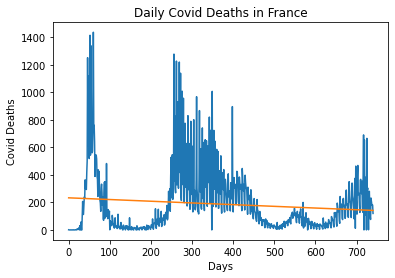

In [ ]:
#And we plot the linear regression line
plt.plot(Y)
plt.plot(trend_line)
plt.xlabel("Days")
plt.ylabel("Covid Deaths")
plt.title("Daily Covid Deaths in France")
plt.show()

**To predict the next seven days we need death count from the last day & coefficient (slope) of the linear regression graph**

In [ ]:
slope = model.coef_[0][0]
last_day = len(fr_series)
y_i = model.intercept_

print("Slope:", slope)
print("Y intercept", y_i)
print("Last day", len(fr_series))

Slope: -0.123846646388851
Y intercept [233.43189614]
Last day 741


Equation is (-0.1770133496399437)x + 233

In [ ]:
def france_covid_calculator (last_day, slope, y_intercept, day_after):
    return int((slope * (last_day+day_after)) + y_intercept)


Calculations:

In [ ]:
print("1st day:", france_covid_calculator(last_day, slope, y_i, 1))
print("2nd day:", france_covid_calculator(last_day, slope, y_i, 2))
print("3rd day:", france_covid_calculator(last_day, slope, y_i, 3))
print("4th day:", france_covid_calculator(last_day, slope, y_i, 4))
print("5th day:", france_covid_calculator(last_day, slope, y_i, 5))
print("6th day:", france_covid_calculator(last_day, slope, y_i, 6))
print("7th day:", france_covid_calculator(last_day, slope, y_i, 7))

1st day: 141
2nd day: 141
3rd day: 141
4th day: 141
5th day: 141
6th day: 140
7th day: 140


# Prediction of death counts for the next seven days in North America

**In order the predict the future days, we need to find the best line which represents the daily covid deaths**

In [ ]:
eu_df = ndf[ndf["continent"] == "North America"]


na_df= eu_df.groupby(["date"]).sum()

# After this we need to remove the NaN & select the columns of data we want
na_df = na_df[na_df["new_deaths"] >= 0]
na_df = na_df["new_deaths"]
na_df

date
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
2020-01-05       0.0
               ...  
2022-03-01    2219.0
2022-03-02    2201.0
2022-03-03    2171.0
2022-03-04    2510.0
2022-03-05     689.0
Name: new_deaths, Length: 795, dtype: float64

In [ ]:
X = [i for i in range(0, len(na_df))] # We turn date into number 0,1,2,3,.....
X = np.reshape(X, (len(X), 1))
Y = na_df.values
model = LinearRegression()

model.fit(X, Y)

trend_line = model.predict(X)

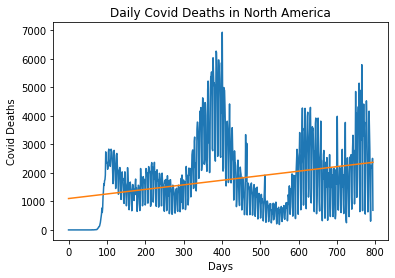

In [ ]:
# Here we plot the linear regression line
plt.plot(Y)
plt.plot(trend_line)
plt.xlabel("Days")
plt.ylabel("Covid Deaths")
plt.title("Daily Covid Deaths in North America")
plt.show()

**To predict the next seven days we need death count from the last day & coefficient (slope) of the linear regression graph**

In [ ]:
slope = model.coef_[0]
#last_day = na_df.iloc[-1] This can be used to find the death count for the last day
last_day = len(na_df)
y_i = model.intercept_

print("Slope:", slope)
print("Y intercept", y_i)
print("Last day", len(na_df))

Slope: 1.59900106492254
Y intercept 1101.0946904332986
Last day 795


Equation is (1.6464653299528385)x + 1101

In [ ]:
def eu_covid_calculator (last_day, slope, y_intercept, day_after):
    return int((slope * (last_day+day_after)) + y_intercept)


Calculations:

In [ ]:
print("1st day:", eu_covid_calculator (last_day, slope, y_i, 1))
print("2nd day:", eu_covid_calculator (last_day, slope, y_i, 2))
print("3rd day:", eu_covid_calculator (last_day, slope, y_i, 3))
print("4th day:", eu_covid_calculator (last_day, slope, y_i, 4))
print("5th day:", eu_covid_calculator (last_day, slope, y_i, 5))
print("6th day:", eu_covid_calculator (last_day, slope, y_i, 6))
print("7th day:", eu_covid_calculator (last_day, slope, y_i, 7))

1st day: 2373
2nd day: 2375
3rd day: 2377
4th day: 2378
5th day: 2380
6th day: 2381
7th day: 2383


**Predicting the next 30 days for USA.**

In [ ]:
series = ndf[ndf["location"] == "United States"]

series = series[series["new_deaths"] >= 0]
usa_series = series[["date","new_deaths"]]

usa_series

,date,new_deaths
157260,2020-02-29,1.0
157261,2020-03-01,0.0
157262,2020-03-02,5.0
157263,2020-03-03,1.0
157264,2020-03-04,4.0
...,...,...
157991,2022-03-01,1691.0
157992,2022-03-02,2095.0
157993,2022-03-03,1743.0
157994,2022-03-04,1883.0


Linear regression model for the united states

In [ ]:
from sklearn.linear_model import LinearRegression

usa_series = series[["new_deaths"]]

X = [i for i in range(0, len(usa_series))] # We turn date into number 0,1,2,3,.....
X = np.reshape(X, (len(X), 1))
Y = usa_series.values
model = LinearRegression()

model.fit(X, Y)

trend_line = model.predict(X)

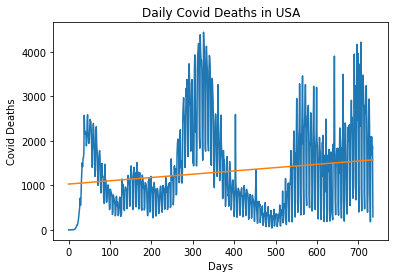

In [ ]:
plt.plot(Y)
plt.plot(trend_line)
plt.xlabel("Days")
plt.ylabel("Covid Deaths")
plt.title("Daily Covid Deaths in USA")
plt.show()

In [ ]:
slope = model.coef_[0][0]
last_day = len(usa_series)
y_i = model.intercept_

print("Slope:", slope)
print("Y intercept", y_i)
print("Last day", len(usa_series))

Slope: 0.7400727216141605
Y intercept [1030.24745959]
Last day 736


In [ ]:
def usa_covid_calculator (last_day, slope, y_intercept, day_after):
    return int((slope * (last_day+day_after)) + y_intercept)

predicting the deaths counts for the following 30 days of the united states

In [ ]:
i = 1;
while i<=30:
  print("Day",i,":", usa_covid_calculator(last_day, slope, y_i, i))
  i = i+1

Day 1 : 1575
Day 2 : 1576
Day 3 : 1577
Day 4 : 1577
Day 5 : 1578
Day 6 : 1579
Day 7 : 1580
Day 8 : 1580
Day 9 : 1581
Day 10 : 1582
Day 11 : 1583
Day 12 : 1583
Day 13 : 1584
Day 14 : 1585
Day 15 : 1586
Day 16 : 1586
Day 17 : 1587
Day 18 : 1588
Day 19 : 1589
Day 20 : 1589
Day 21 : 1590
Day 22 : 1591
Day 23 : 1591
Day 24 : 1592
Day 25 : 1593
Day 26 : 1594
Day 27 : 1594
Day 28 : 1595
Day 29 : 1596
Day 30 : 1597
